In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn import tree 
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
% matplotlib inline

In [2]:
df = pd.read_csv('/home/srikar/MLg6/voice.csv',sep=',')
df.shape

(3168, 21)

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df1 = pd.DataFrame(df.dtypes,columns=['Data Type'])
df1 = df1.reset_index()
df1.columns = ['Attribute Name','Data Type']
df1

,Attribute Name,Data Type
0,meanfreq,float64
1,sd,float64
2,median,float64
3,Q25,float64
4,Q75,float64
5,IQR,float64
6,skew,float64
7,kurt,float64
8,sp.ent,float64
9,sfm,float64


In [5]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [7]:
columns = df.columns

In [8]:
X = df[columns[0:20]].copy()
y = df[columns[-1]].copy()
print('Independent var: \n',X.head(3),'\n')
print('Dependent var: \n',y.head(3))

Independent var: 
    meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   

          kurt    sp.ent       sfm  mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918   0.0  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724   0.0  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905   0.0  0.077316  0.098706  0.015656   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   

Dependent var: 
 0    male
1    male
2    male
Name: label, dtype: object


In [9]:
encode_obj = LabelEncoder()
y = encode_obj.fit_transform(y)
print('sample values of target values:\n',y[0:3])

sample values of target values:
 [1 1 1]


In [10]:
test_x_train,test_x_test,test_y_train,test_y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=1)

In [11]:
#raw data predictions
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(test_x_train, test_y_train)
nbpreds_test = nbclf.predict(test_x_test)
print('Accuracy obtained from train-test split on training data is:',nbclf.score(test_x_train, test_y_train))
print('Accuracy obtained from train-test split on testing data is:',nbclf.score(test_x_test, test_y_test))

Accuracy obtained from train-test split on training data is: 0.876479873717
Accuracy obtained from train-test split on testing data is: 0.869085173502


In [12]:
test_eval_result = cross_val_score(nbclf, X, y, cv=5, scoring='accuracy')
print('Accuracy obtained from 5-fold cross validation on actual raw data is:',test_eval_result.mean())

Accuracy obtained from 5-fold cross validation on actual raw data is: 0.846230483568


**Let's do some Visualization **

(array([  67.,  121.,  127.,  227.,  479.,  755.,  532.,  500.,  271.,   89.]),
 array([  2.28758170e-04,   2.49405762e-02,   4.96523943e-02,
          7.43642124e-02,   9.90760304e-02,   1.23787848e-01,
          1.48499667e-01,   1.73211485e-01,   1.97923303e-01,
          2.22635121e-01,   2.47346939e-01]),
 <a list of 10 Patch objects>)

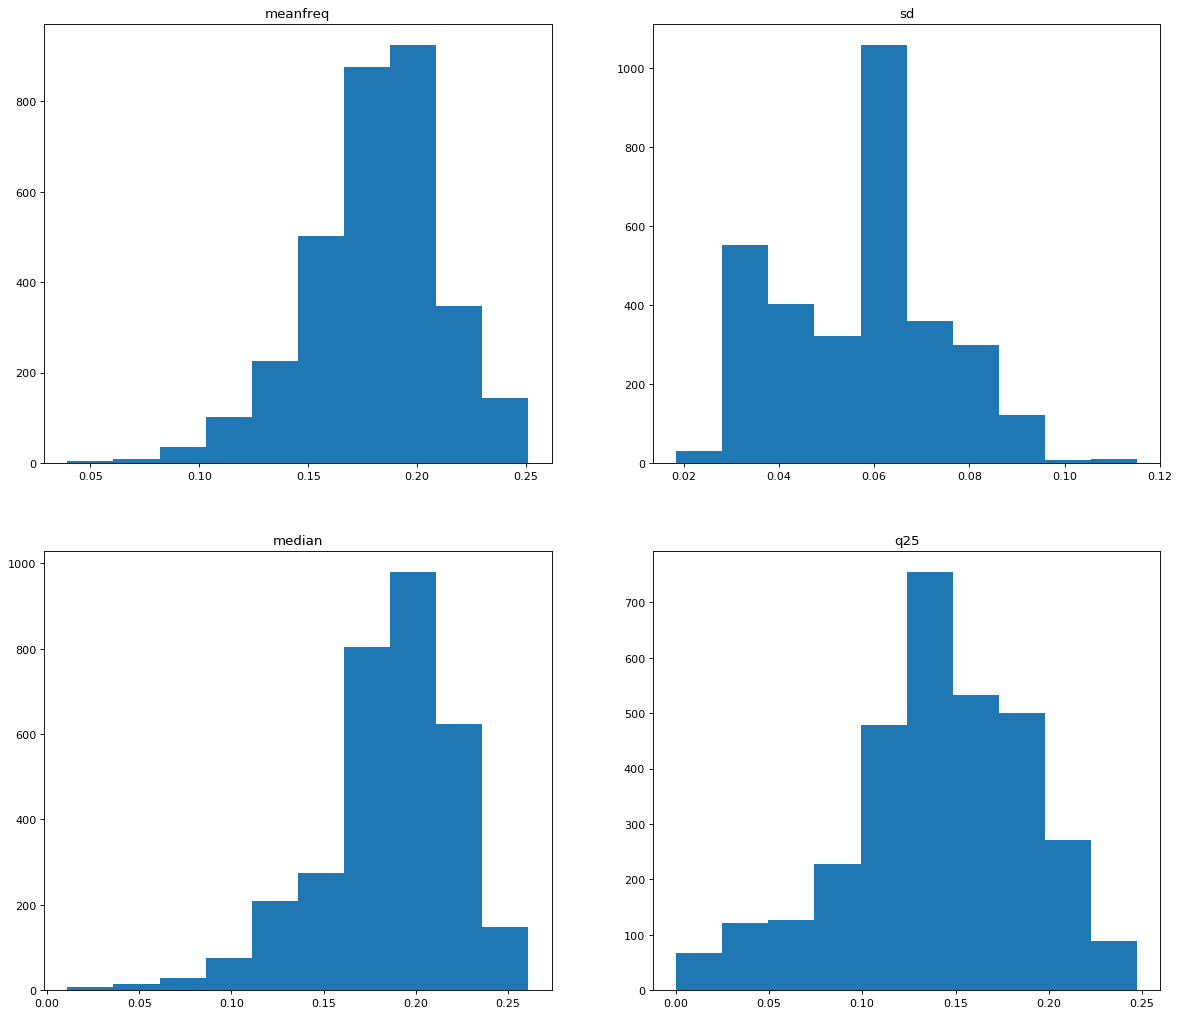

In [14]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.title('meanfreq')
plt.hist(X['meanfreq'])
plt.subplot(222)
plt.title('sd')
plt.hist(X['sd'])
plt.subplot(223)
plt.title('median')
plt.hist(X['median'])
plt.subplot(224)
plt.title('q25')
plt.hist(X['Q25'])

(array([ 3037.,    23.,    13.,    13.,    20.,    20.,    21.,    12.,
            5.,     4.]),
 array([    2.06845549,   132.82289868,   263.57734187,   394.33178505,
          525.08622824,   655.84067143,   786.59511462,   917.34955781,
         1048.10400099,  1178.85844418,  1309.61288737]),
 <a list of 10 Patch objects>)

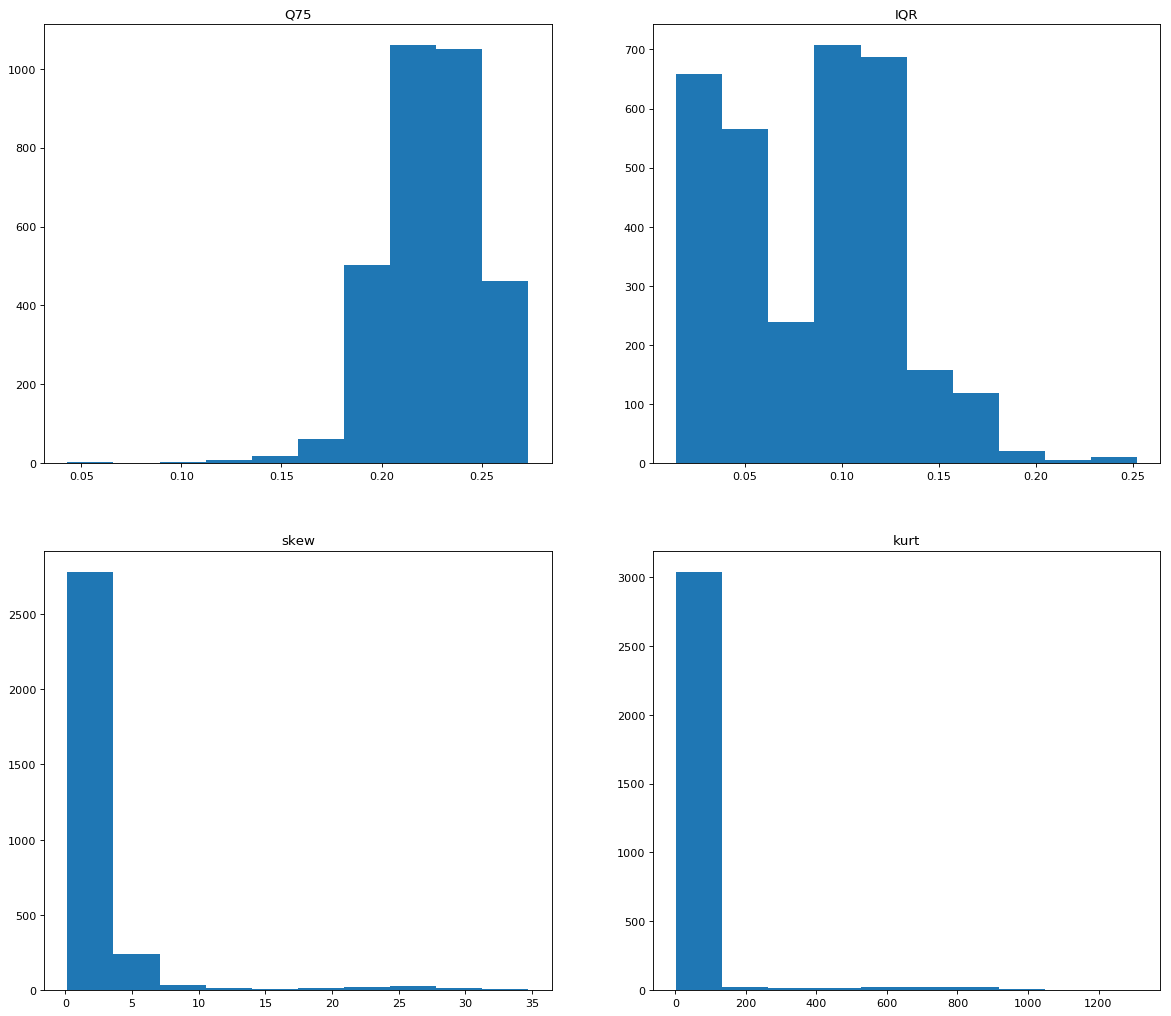

In [15]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.title('Q75')
plt.hist(X['Q75'])
plt.subplot(222)
plt.title('IQR')
plt.hist(X['IQR'])
plt.subplot(223)
plt.title('skew')
plt.hist(X['skew'])
plt.subplot(224)
plt.title('kurt')
plt.hist(X['kurt'])

(array([   4.,    8.,   35.,  101.,  225.,  502.,  876.,  925.,  347.,  145.]),
 array([ 0.03936334,  0.06053938,  0.08171543,  0.10289147,  0.12406751,
         0.14524355,  0.16641959,  0.18759563,  0.20877168,  0.22994772,
         0.25112376]),
 <a list of 10 Patch objects>)

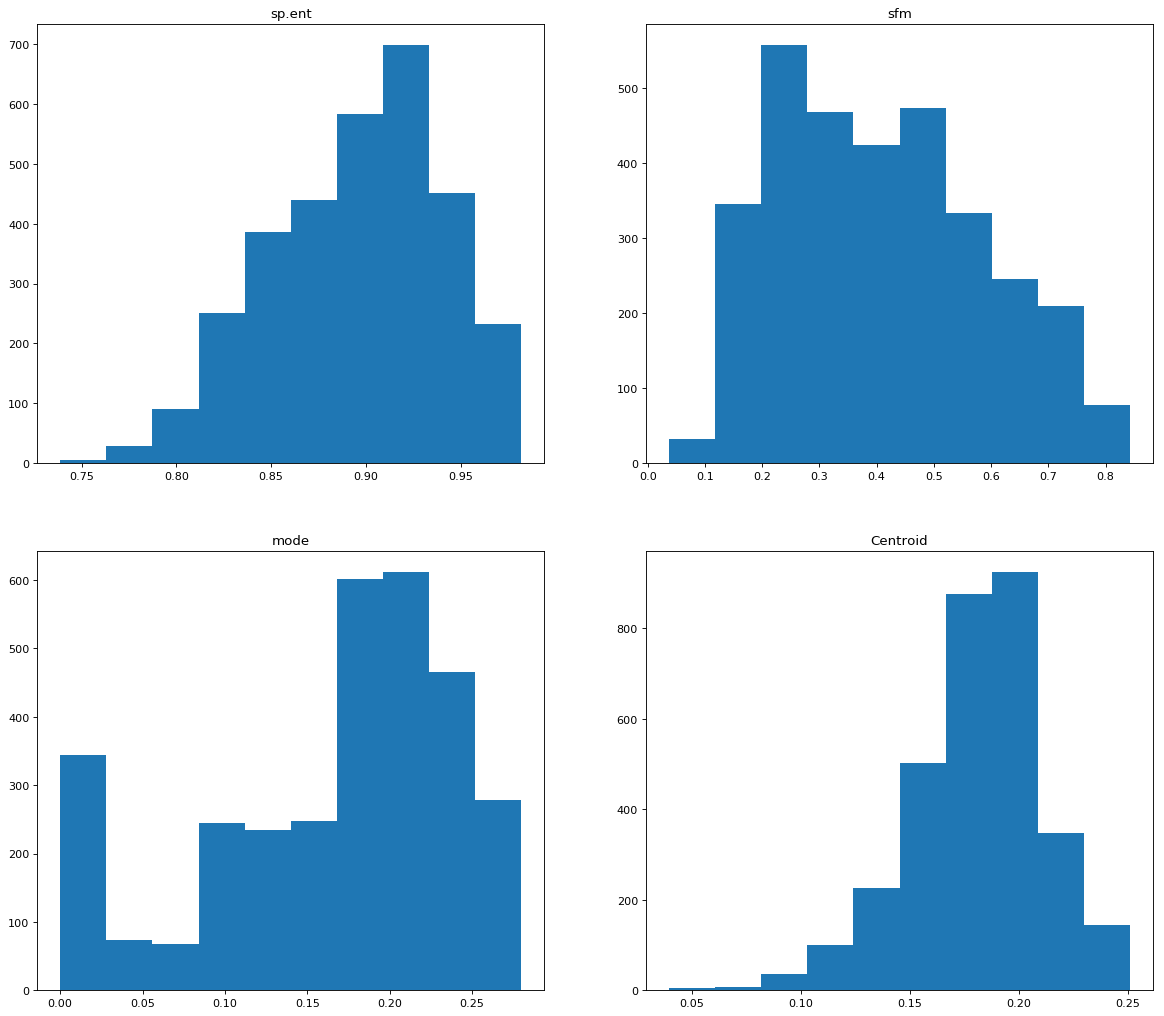

In [16]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.title('sp.ent')
plt.hist(X['sp.ent'])
plt.subplot(222)
plt.title('sfm')
plt.hist(X['sfm'])
plt.subplot(223)
plt.title('mode')
plt.hist(X['mode'])
plt.subplot(224)
plt.title('Centroid')
plt.hist(X['centroid'])

(array([ 576.,  645.,  634.,  533.,  404.,  203.,  113.,   41.,   16.,    3.]),
 array([ 0.0078125 ,  0.30279948,  0.59778646,  0.89277344,  1.18776042,
         1.4827474 ,  1.77773438,  2.07272135,  2.36770833,  2.66269531,
         2.95768229]),
 <a list of 10 Patch objects>)

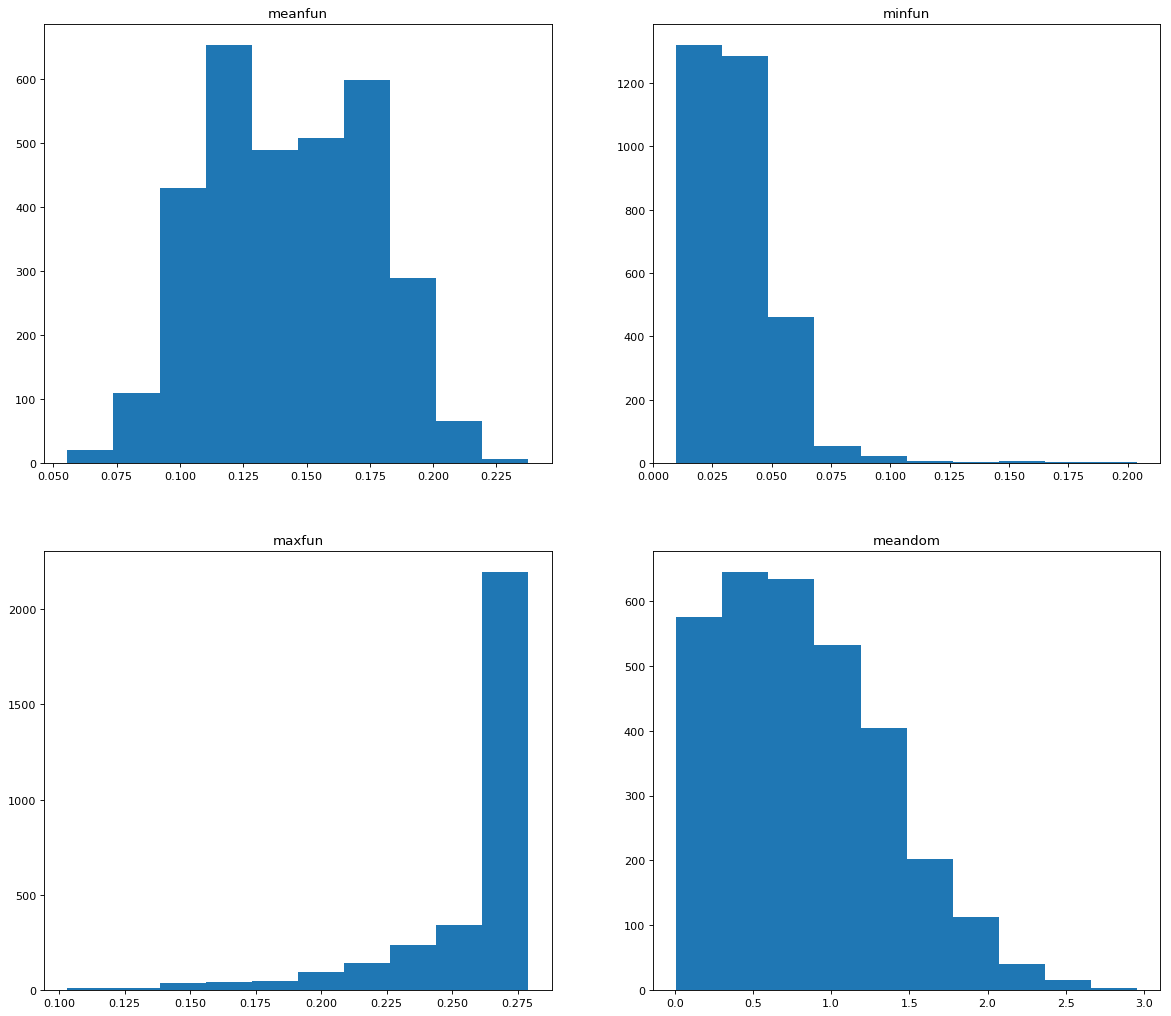

In [17]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.title('meanfun')
plt.hist(X['meanfun'])
plt.subplot(222)
plt.title('minfun')
plt.hist(X['minfun'])
plt.subplot(223)
plt.title('maxfun')
plt.hist(X['maxfun'])
plt.subplot(224)
plt.title('meandom')
plt.hist(X['meandom'])

(array([  653.,  1545.,   514.,   248.,    96.,    56.,    30.,    16.,
            4.,     6.]),
 array([ 0.        ,  0.09323741,  0.18647482,  0.27971223,  0.37294964,
         0.46618705,  0.55942446,  0.65266187,  0.74589928,  0.83913669,
         0.9323741 ]),
 <a list of 10 Patch objects>)

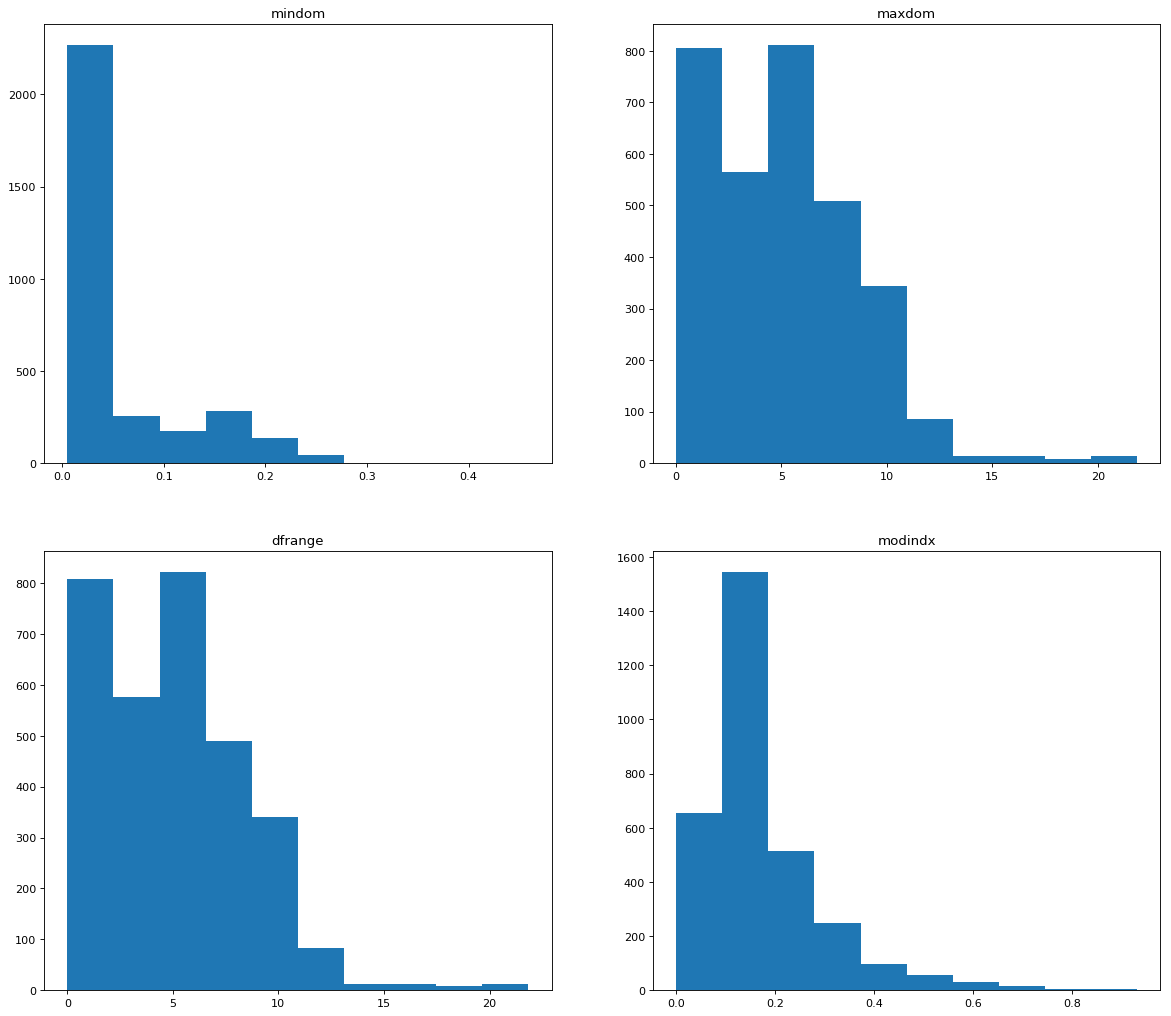

In [18]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.title('mindom')
plt.hist(X['mindom'])
plt.subplot(222)
plt.title('maxdom')
plt.hist(X['maxdom'])
plt.subplot(223)
plt.title('dfrange')
plt.hist(X['dfrange'])
plt.subplot(224)
plt.title('modindx')
plt.hist(X['modindx'])

1    1584
0    1584
dtype: int64


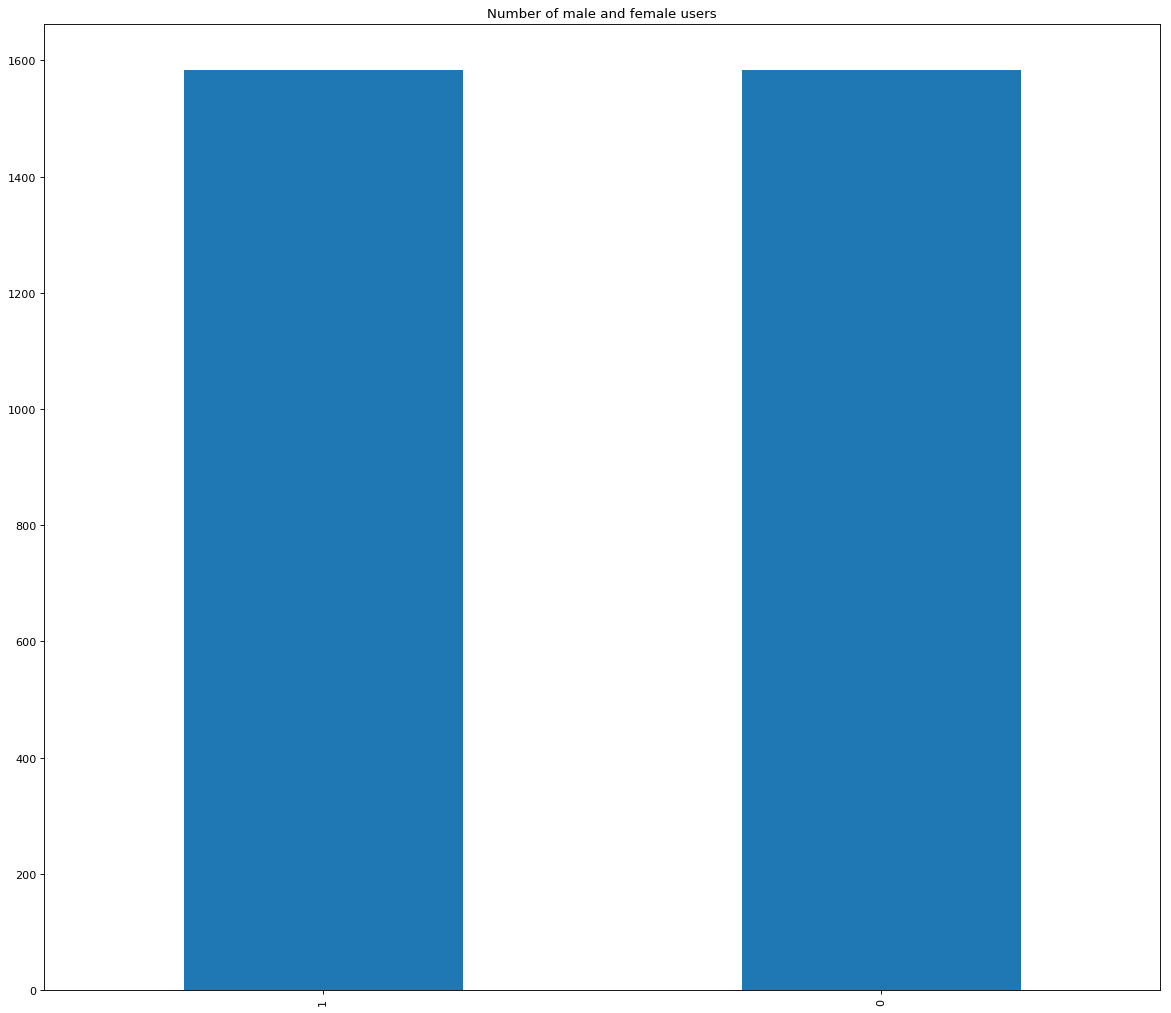

In [19]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
print(pd.Series(y).value_counts())
pd.Series(y).value_counts().plot(kind='bar', title='Number of male and female users')

**_our analysis shows that <br/>
meanfreq, sd, median, Q25, Q75, sp.ent, sfm, centroid, meanfun are Normally distributed
skew, kurt, minfun, maxfun, meandom, mindom, maxdom, dfrange, midindex, IQR, mode are skewed<br/>
<br/>_**
 
 

In [20]:
means = X.describe().loc['mean']
medians =X.describe().loc['50%']
pd.DataFrame([means,medians], index=['mean','median'])

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
median,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357


In [22]:
#lets filter outliers from male users
male_funFreq_outlier_index = df[((df['meanfun'] < 0.085) | (df['meanfun'] > 0.180)) & 
                                      (df['label'] == 'male')].index
male_funFreq_outlier_index = list(male_funFreq_outlier_index)
df[((df['meanfun'] < 0.085) | (df['meanfun'] > 0.180)) & (df['label'] == 'male')].shape

(70, 21)

In [23]:
#lets filter outliers from female users
female_funFreq_outlier_index = df[((df['meanfun'] < 0.165) | (df['meanfun'] > 0.255)) & 
                                        (df['label'] == 'female')].index
female_funFreq_outlier_index = list(female_funFreq_outlier_index)
df[((df['meanfun'] < 0.165) | (df['meanfun'] > 0.255)) & (df['label'] == 'female')].shape

(640, 21)

In [24]:
remove = male_funFreq_outlier_index + female_funFreq_outlier_index
lent = len(remove)
print("Need to get rid of %d from X and y"%lent)

Need to get rid of 710 from X and y


In [25]:
X = X.drop(remove,axis=0)
X.shape

(2458, 20)

In [26]:
y = pd.Series(y).drop(remove,axis=0)
y.shape

(2458,)

After cleaning, here's what the target looks like 

1    1514
0     944
dtype: int64


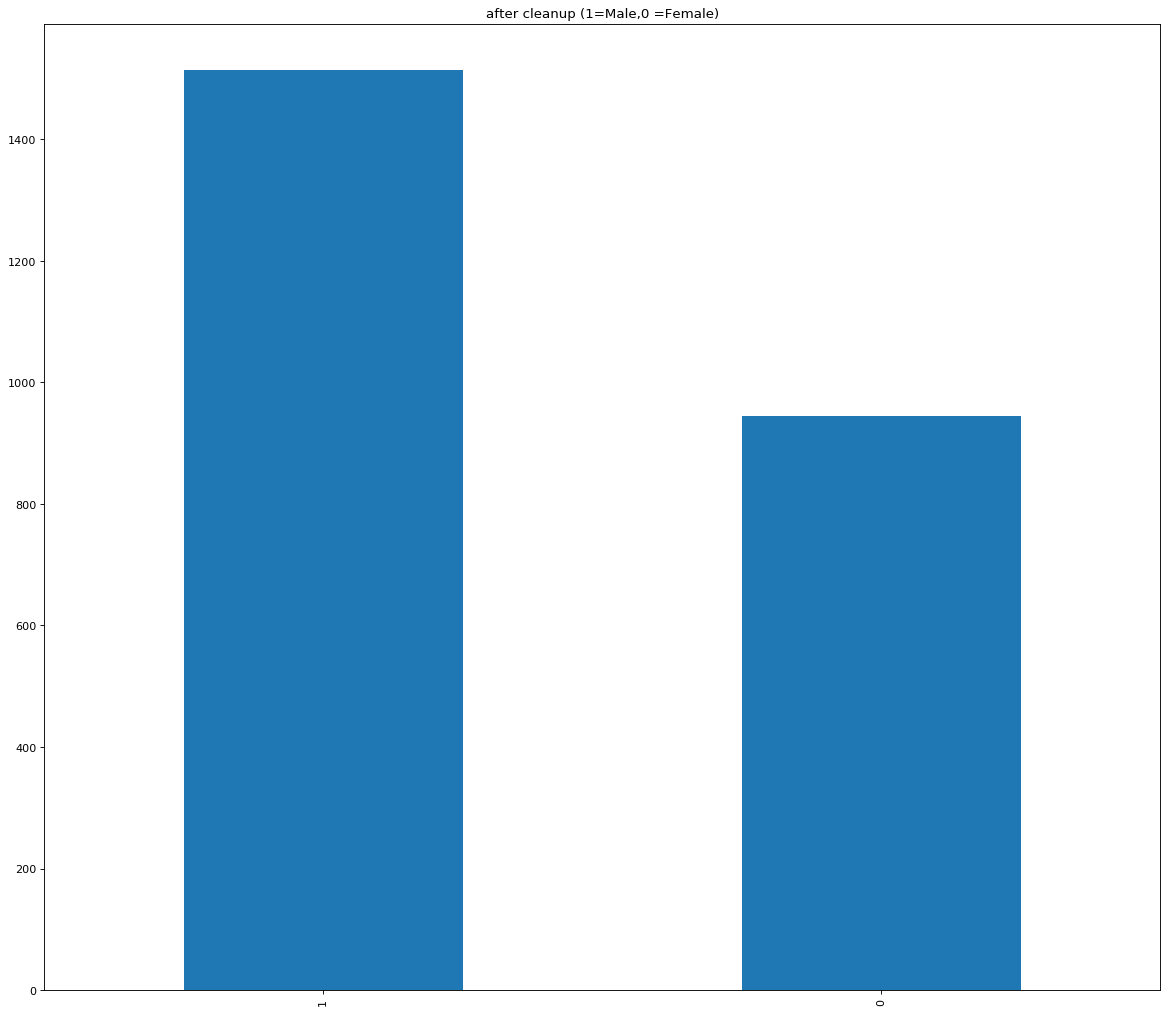

In [27]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

print(y.value_counts())

y.value_counts().plot(kind='bar', title='after cleanup (1=Male,0 =Female)')

In [38]:
# Z-score Normalization on meanfreq, median, Q25, Q75
#minmax of IQR
z_score_norm = lambda colname: (X[colname]- X[colname].mean())/(X[colname].std())
min_max_norm = lambda colname: (X[colname]- X[colname].min())/(X[colname].max()-X[colname].min())

In [39]:
X1 = X.copy()
X1['z_meanfreq'] = z_score_norm('meanfreq')
X1['z_median'] = z_score_norm('median')
X1['z_Q25'] = z_score_norm('Q25')
X1['z_Q75'] = z_score_norm('Q75')
X1['Norm_IQR'] = min_max_norm('IQR')

In [40]:
X1 = X1.drop(['meanfreq','median','Q25','Q75','IQR'],axis=1)


In [41]:
X1.head()

,sd,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,z_meanfreq,z_median,z_Q25,z_Q75,Norm_IQR
1,0.067310,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,-3.720840,-3.828504,-2.355691,-5.781683,0.246961
2,0.083829,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,-3.354719,-3.920638,-2.570261,-4.094335,0.457148
3,0.072111,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,-0.961373,-0.737091,-0.810072,-0.824403,0.407358
4,0.079146,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,-1.482953,-1.612552,-1.167826,-0.906544,0.474474
5,0.079557,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,-1.558529,-1.758652,-1.383386,-0.754042,0.534679


(array([ 476.,  299.,  126.,  660.,  639.,  125.,  107.,   16.,    1.,    9.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

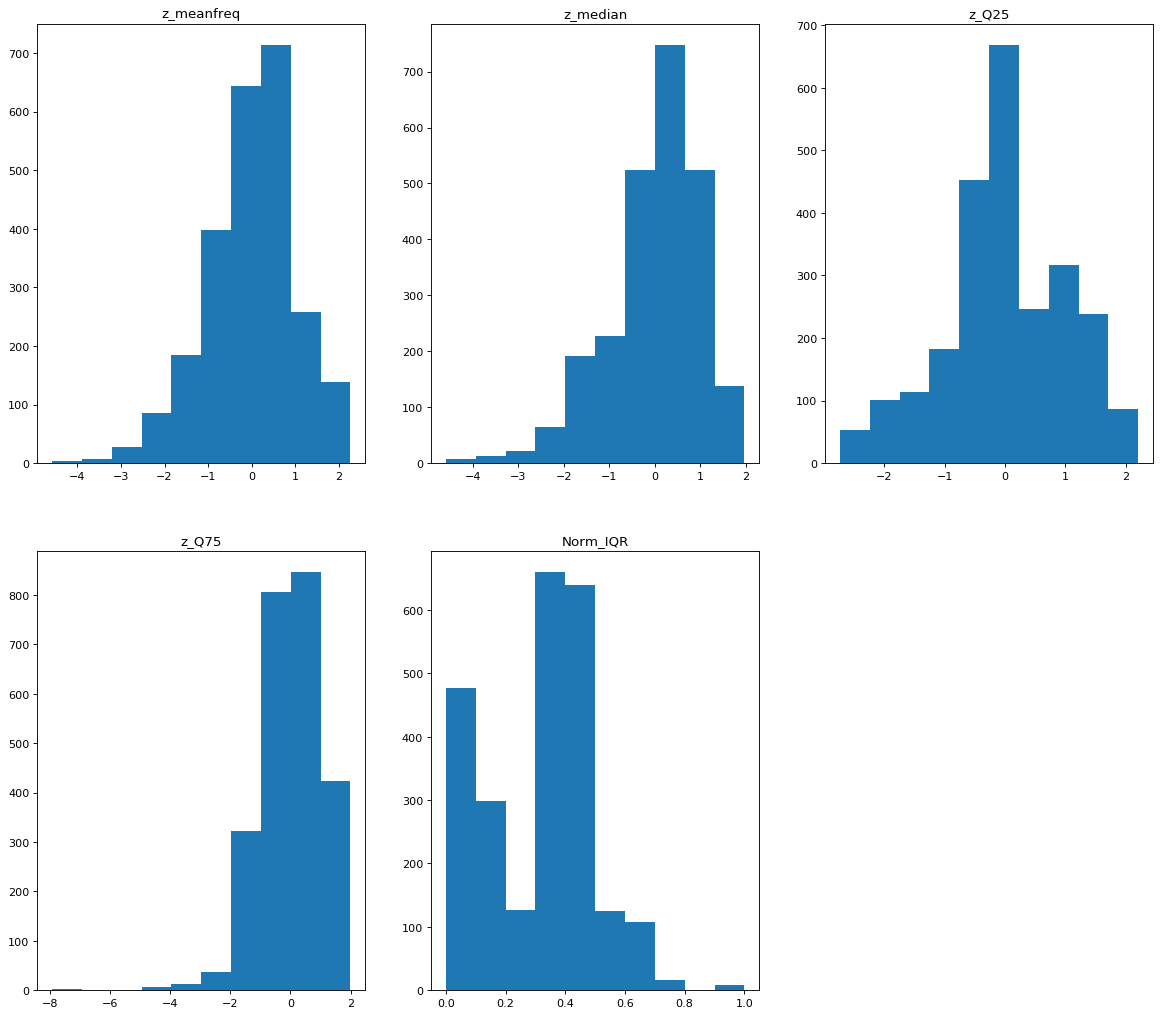

In [48]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(231)
plt.title('z_meanfreq')
plt.hist(X1['z_meanfreq'])
plt.subplot(232)
plt.title('z_median')
plt.hist(X1['z_median'])
plt.subplot(233)
plt.title('z_Q25')
plt.hist(X1['z_Q25'])
plt.subplot(234)
plt.title('z_Q75')
plt.hist(X1['z_Q75'])
plt.subplot(235)
plt.title('Norm_IQR')
plt.hist(X1['Norm_IQR'])

In [51]:
correlation_mat = X1.corr()
correlation_mat

,sd,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,z_meanfreq,z_median,z_Q25,z_Q75,Norm_IQR
sd,1.000000,0.268792,0.305891,0.748671,0.841054,-0.518399,-0.761064,-0.466995,-0.334265,-0.128949,-0.445008,-0.371717,-0.447752,-0.441069,0.124674,-0.761064,-0.593734,-0.864655,-0.217083,0.899810
skew,0.268792,1.000000,0.978731,-0.186965,0.052345,-0.404677,-0.292907,-0.080008,-0.174601,-0.034663,-0.308871,-0.068304,-0.270584,-0.269368,-0.130912,-0.292907,-0.254069,-0.280212,-0.211600,0.214066
kurt,0.305891,0.978731,1.000000,-0.103409,0.098550,-0.377308,-0.295208,-0.119739,-0.179806,-0.015390,-0.283337,-0.105741,-0.248240,-0.246347,-0.173645,-0.295208,-0.245334,-0.311618,-0.167253,0.275422
sp.ent,0.748671,-0.186965,-0.103409,1.000000,0.882300,-0.345448,-0.653044,-0.558854,-0.319500,-0.157173,-0.302235,-0.318209,-0.325037,-0.319313,0.166691,-0.653044,-0.544028,-0.699490,-0.244650,0.690033
sfm,0.841054,0.052345,0.098550,0.882300,1.000000,-0.487812,-0.798872,-0.434546,-0.349963,-0.193208,-0.412508,-0.312801,-0.410816,-0.405195,0.190494,-0.798872,-0.681039,-0.787767,-0.419489,0.698088
mode,-0.518399,-0.404677,-0.377308,-0.345448,-0.487812,1.000000,0.703159,0.305558,0.353356,0.170668,0.475223,0.209490,0.456170,0.452416,-0.214109,0.703159,0.710436,0.602051,0.536980,-0.414729
centroid,-0.761064,-0.292907,-0.295208,-0.653044,-0.798872,0.703159,1.000000,0.474303,0.371094,0.255896,0.547437,0.252269,0.524504,0.519982,-0.233599,1.000000,0.927085,0.925011,0.758994,-0.673457
meanfun,-0.466995,-0.080008,-0.119739,-0.558854,-0.434546,0.305558,0.474303,1.000000,0.345183,0.325146,0.246622,0.163801,0.257634,0.254693,-0.088519,0.474303,0.423266,0.552781,0.192549,-0.545740
minfun,-0.334265,-0.174601,-0.179806,-0.319500,-0.349963,0.353356,0.371094,0.345183,1.000000,0.175142,0.305936,0.123851,0.232142,0.229921,0.043800,0.371094,0.336728,0.336769,0.236711,-0.266933
maxfun,-0.128949,-0.034663,-0.015390,-0.157173,-0.193208,0.170668,0.255896,0.325146,0.175142,1.000000,0.320966,-0.239510,0.341457,0.345801,-0.393378,0.255896,0.237218,0.208284,0.250017,-0.108211


In [52]:
for names in correlation_mat.index:
    if len(correlation_mat[(correlation_mat.loc[names] > 0.9) & (correlation_mat.loc[names].index != names)].index) > 0:
        print('column', names,' strongly correlationelates with: ',correlation_mat[(correlation_mat.loc[names] > 0.9) &(correlation_mat.loc[names].index != names)].index)



column skew  strongly correlationelates with:  Index(['kurt'], dtype='object')
column kurt  strongly correlationelates with:  Index(['skew'], dtype='object')
column centroid  strongly correlationelates with:  Index(['z_meanfreq', 'z_median', 'z_Q25'], dtype='object')
column maxdom  strongly correlationelates with:  Index(['dfrange'], dtype='object')
column dfrange  strongly correlationelates with:  Index(['maxdom'], dtype='object')
column z_meanfreq  strongly correlationelates with:  Index(['centroid', 'z_median', 'z_Q25'], dtype='object')
column z_median  strongly correlationelates with:  Index(['centroid', 'z_meanfreq'], dtype='object')
column z_Q25  strongly correlationelates with:  Index(['centroid', 'z_meanfreq'], dtype='object')


In [53]:
corr_df = pd.DataFrame([{'Column Name':'skew', 'Correlated with':'kurt'},
                        {'Column Name':'kurt', 'Correlated with':'skew'},
                        {'Column Name':'centroid', 'Correlated with':['z_meanfreq', 'z_median', 'z_Q25']},
                        {'Column Name':'maxdom', 'Correlated with':['dfrange']},
                        {'Column Name':'dfrange', 'Correlated with':['maxdom']},
                        {'Column Name':'z_meanfreq', 'Correlated with':['centroid', 'z_median', 'z_Q25']},
                        {'Column Name':'z_median', 'Correlated with':['centroid', 'z_meanfreq']},
                        {'Column Name':'z_Q25', 'Correlated with':['centroid', 'z_meanfreq']},
                        ])
corr_df

,Column Name,Correlated with
0,skew,kurt
1,kurt,skew
2,centroid,"[z_meanfreq, z_median, z_Q25]"
3,maxdom,[dfrange]
4,dfrange,[maxdom]
5,z_meanfreq,"[centroid, z_median, z_Q25]"
6,z_median,"[centroid, z_meanfreq]"
7,z_Q25,"[centroid, z_meanfreq]"


** We see that high correlation exists between the above variables<br/>
lets remove kurt, Centroid, dfrange, z_meanfreq**

In [54]:
X2 = X1.drop(['kurt', 'centroid', 'dfrange', 'z_meanfreq'],axis=1).copy()
X2.head(3)

,sd,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,z_median,z_Q25,z_Q75,Norm_IQR
1,0.067310,22.423285,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,-3.828504,-2.355691,-5.781683,0.246961
2,0.083829,30.757155,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,-3.920638,-2.570261,-4.094335,0.457148
3,0.072111,1.232831,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,-0.737091,-0.810072,-0.824403,0.407358


In [56]:
# let us do a 80-20 split on the cleaned dataset
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y,train_size=0.8,test_size=0.2,random_state=1)

In [58]:
X2_train.shape

(1966, 16)

In [59]:
X2_test.shape

(492, 16)

In [60]:
y2_train.shape

(1966,)

In [62]:
y2_test.shape

(492,)

In [63]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(X2_train, y2_train)
nbpreds_test = nbclf.predict(X2_test)
nb_eval_result = cross_val_score(nbclf, X2, y, cv=5, scoring='accuracy')
print('Mean accuracy with 5 fold cross validation on Naive Bayes with dimention reduced data: ',nb_eval_result.mean())

Mean accuracy with 5 fold cross validation on Naive Bayes with dimention reduced data:  0.969495603119


** we see a significant improvement in accuracy as compared to the accuracy of raw data we classified with**

**Let's buid kernels with svm**

In [64]:
def funct_svm(kernal_type,xTrain,yTrain,xTest,yTest):
    svm_obj=SVC(kernel=kernal_type)
    svm_obj.fit(xTrain,yTrain)
    yPredicted=svm_obj.predict(xTest)
    print('Accuracy Score of',kernal_type,'Kernal SVM is:',metrics.accuracy_score(yTest,yPredicted))
    return metrics.accuracy_score(yTest,yPredicted)

In [67]:
#linear kernel
%timeit 10
linear_result = funct_svm('linear',X2_train,y2_train,X2_test,y2_test)

The slowest run took 84.59 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 15.4 ns per loop
Accuracy Score of linear Kernal SVM is: 0.941056910569


In [69]:
#gaussian/rbf kernel
%timeit 10
rbf_result = funct_svm('rbf',X2_train,y2_train,X2_test,y2_test)

The slowest run took 78.48 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.6 ns per loop
Accuracy Score of rbf Kernal SVM is: 0.955284552846


In [71]:
#polynomial kernel

%timeit 10
poly_result = funct_svm('poly',X2_train,y2_train,X2_test,y2_test)

The slowest run took 75.46 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.3 ns per loop
Accuracy Score of poly Kernal SVM is: 0.951219512195


In [73]:
#sigmoid kernel
%timeit 10
DR_sigmoid_result = funct_svm('sigmoid',X2_train,y2_train,X2_test,y2_test)

The slowest run took 83.19 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.3 ns per loop
Accuracy Score of sigmoid Kernal SVM is: 0.678861788618


** dataset is behaving well linearly, it is explicitly known that it doesn't work well in a sigmoidal space**<br/>
_the voice dataset is both linearly and gaussian seperable_

**LETS COMPLETELY NORMALIZE THE DATA AND SEE THE ABOVE RESULTS**

In [75]:
# let me not do any dimentionality reduction and do z-score normalization on all independent variables
xDataStdardized = StandardScaler()
xDataStdardized.fit(X)
X3 = xDataStdardized.transform(X).copy()

In [78]:
X3 = pd.DataFrame(X3, columns=columns[0:20])
X3.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-3.721597,0.544377,-3.829283,-2.356170,-5.782859,-0.397800,5.075036,4.855087,-0.102172,0.554202,-2.145988,-3.721597,-1.004514,-1.135221,-0.305371,-1.659948,-0.683626,-1.471597,-1.459346,-0.995844
1,-3.355401,1.537541,-3.921435,-2.570784,-4.095168,0.781574,7.236841,7.993543,-1.089783,0.363138,-2.145988,-3.355401,-1.275017,-1.143789,0.389022,-1.662045,-0.683626,-1.483124,-1.470873,-1.045086
2,-0.961569,0.832992,-0.737241,-0.810237,-0.824571,0.502200,-0.421765,-0.214160,1.431488,1.725800,-1.079112,-0.961569,-1.560500,-1.036055,-0.305371,-1.266012,-0.683626,-1.321742,-1.309482,0.569030


In [79]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y,train_size=0.8,test_size=0.2,random_state=1)

In [80]:
X3_train.shape

(1966, 20)

In [81]:
X3_test.shape

(492, 20)

In [82]:
y3_train.shape

(1966,)

In [83]:
y3_test.shape

(492,)

In [84]:
#linear kernel with fully normalized data
%timeit 10
linear_result = funct_svm('linear',X3_train,y3_train,X3_test,y3_test)

The slowest run took 180.16 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.3 ns per loop
Accuracy Score of linear Kernal SVM is: 0.993902439024


In [85]:
#gaussian/rbf kernel with fully normalized data
%timeit 10
rbf_result = funct_svm('rbf',X3_train,y3_train,X3_test,y3_test)

The slowest run took 116.19 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.3 ns per loop
Accuracy Score of rbf Kernal SVM is: 0.993902439024


In [86]:
#polynomial kernel with fully normalized data

%timeit 10
poly_result = funct_svm('poly',X3_train,y3_train,X3_test,y3_test)

The slowest run took 76.23 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.4 ns per loop
Accuracy Score of poly Kernal SVM is: 0.985772357724


** We see that linear and gaussian kernels give us the highest accuracy with fully normalized data and polynomial performs relatively better than thepolynomial kernel for cleaned data we used earlier**

In [87]:
#sigmoid kernel with fully normalized data
%timeit 10
DR_sigmoid_result = funct_svm('sigmoid',X3_train,y3_train,X3_test,y3_test)

The slowest run took 70.10 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.3 ns per loop
Accuracy Score of sigmoid Kernal SVM is: 0.831300813008


**Lets perform crossvalidation with k=5 on our models**

***Linear Kernel***

In [88]:
def funct_svm_cv(kernal_type,xData,yData,k,eval_param):
    svm_obj=SVC(kernel=kernal_type)
    eval_result = cross_val_score(svm_obj, xData, yData, cv=k, scoring=eval_param)
    print(eval_param,'of each fold is:',eval_result)
    print('Mean accuracy with 5 fold cross validation for',kernal_type,' kernal SVM is: ',eval_result.mean())
    return eval_result.mean()

In [96]:
#Linear kernel on cleaned data with 5 folds
%timeit 10
CV_linear_result = funct_svm_cv('linear',X2,y,5,'accuracy')


The slowest run took 81.94 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.4 ns per loop
accuracy of each fold is: [ 0.79065041  0.91056911  0.97764228  0.99593496  0.94081633]
Mean accuracy with 5 fold cross validation for linear  kernal SVM is:  0.9231226149


In [91]:
#Linear kernel on normalized data with 5 folds
%timeit 10
CN_CV_linear_result = funct_svm_cv('linear',X3,y,5,'accuracy')


The slowest run took 72.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.4 ns per loop
accuracy of each fold is: [ 0.99186992  0.97764228  1.          1.          1.        ]
Mean accuracy with 5 fold cross validation for linear  kernal SVM is:  0.993902439024


***Gaussian/rbf kernel***

In [92]:
#Gaussian kernel on cleaned data with 5 folds
%timeit 10
CV_rbf_result = funct_svm_cv('rbf',X2,y,5,'accuracy')

The slowest run took 58.30 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 18.5 ns per loop
accuracy of each fold is: [ 0.83333333  0.91869919  0.98170732  0.97560976  0.94489796]
Mean accuracy with 5 fold cross validation for rbf  kernal SVM is:  0.930849510536


In [93]:
#Gaussian kernel on normalized data with 5 folds
%timeit 10
CV_rbf_result = funct_svm_cv('rbf',X3,y,5,'accuracy')

The slowest run took 65.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.3 ns per loop
accuracy of each fold is: [ 0.9695122   0.97357724  0.9898374   1.          1.        ]
Mean accuracy with 5 fold cross validation for rbf  kernal SVM is:  0.986585365854


***Polynomial kernel***

In [94]:
#polynomial kernel on cleaned data with 5 folds
%timeit 10
CV_rbf_result = funct_svm_cv('poly',X2,y,5,'accuracy')

The slowest run took 99.94 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 15.3 ns per loop
accuracy of each fold is: [ 0.8699187   0.91666667  0.98170732  0.98780488  0.96122449]
Mean accuracy with 5 fold cross validation for poly  kernal SVM is:  0.943464410154


In [95]:
#polynomial kernel on normalized data with 5 folds
%timeit 10
CV_rbf_result = funct_svm_cv('poly',X3,y,5,'accuracy')

100000000 loops, best of 3: 15.3 ns per loop
accuracy of each fold is: [ 0.95934959  0.96747967  0.97560976  0.98780488  0.98367347]
Mean accuracy with 5 fold cross validation for poly  kernal SVM is:  0.974783474365


**Hyper parameter tuning with 5 fold cross validation**

In [ ]:
#c range from 1-10

In [97]:
def funct_tune_svm(kernal_type,margin_val,xData,yData,k,eval_param):
    if(kernal_type=='linear'):
        svm_obj=SVC(kernel=kernal_type,C=margin_val)
    elif(kernal_type=='rbf'):
        svm_obj=SVC(kernel=kernal_type,gamma=margin_val)
    elif(kernal_type=='poly'):
        svm_obj=SVC(kernel=kernal_type,degree=margin_val) 
    eval_result = cross_val_score(svm_obj, xData, yData, cv=k, scoring=eval_param)
    return eval_result.mean()

**Hyper parameter Tuning completely normalized data(Linear)**

In [98]:
accu_list = list()
for c in np.arange(0.1,10,0.5):
    result = funct_tune_svm('linear',c,X3,y,5,'accuracy')
    accu_list.append(result)

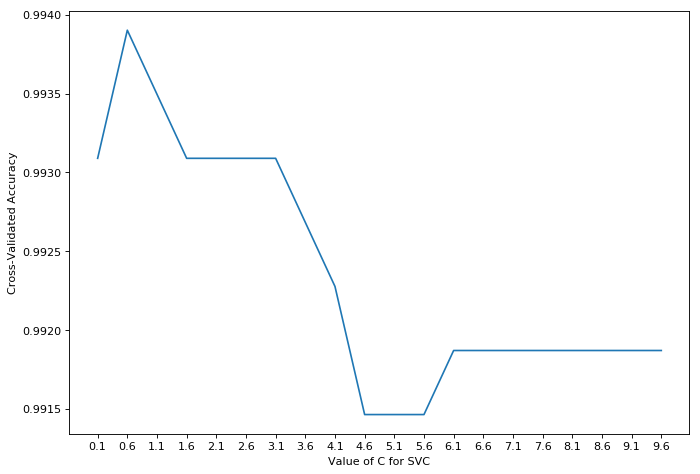

In [102]:
C_values=np.arange(0.1,10,0.5)
# value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(C_values,accu_list)
plt.xticks(np.arange(0.1,10,0.5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [103]:
tuning_linear_svm = pd.DataFrame(columns=['Penality Parameter C', 'Accuracy'])
tuning_linear_svm['Penality Parameter C'] = np.arange(0.1,10,0.5)
tuning_linear_svm['Accuracy'] = accu_list
tuning_linear_svm

,Penality Parameter C,Accuracy
0,0.1,0.993089
1,0.6,0.993902
2,1.1,0.993496
3,1.6,0.993089
4,2.1,0.993089
5,2.6,0.993089
6,3.1,0.993089
7,3.6,0.992683
8,4.1,0.992276
9,4.6,0.991463


**Tuning RBF/Gaussian**

In [104]:
# with normlized dataset
accu_list = list()
for c in np.arange(0.1,10,1):
    result = funct_tune_svm('rbf',c,X3,y,5,'accuracy')
    accu_list.append(result)

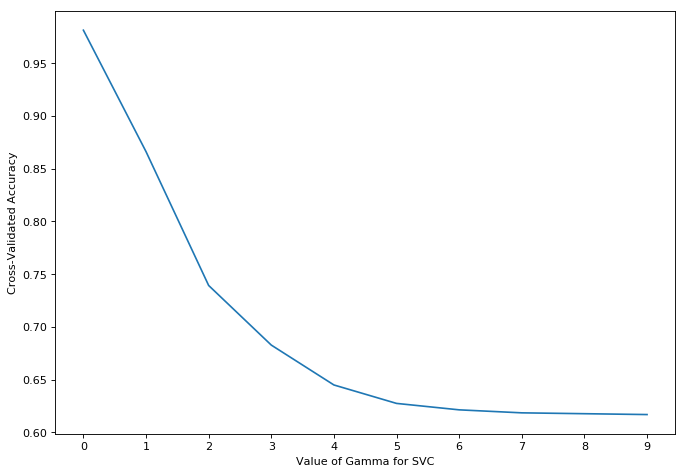

In [105]:
C_values=list(range(0,10))
# value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(C_values,accu_list)
plt.xticks(np.arange(0,10,1))
plt.xlabel('Value of Gamma for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [106]:
tuning_rbf_svm = pd.DataFrame(columns=['Parameter Gamma', 'Accuracy'])
tuning_rbf_svm['Parameter Gamma'] = np.arange(0.1,10,1)
tuning_rbf_svm['Accuracy'] = accu_list
tuning_rbf_svm

,Parameter Gamma,Accuracy
0,0.1,0.981289
1,1.1,0.866114
2,2.1,0.739190
3,3.1,0.682660
4,4.1,0.644832
5,5.1,0.627340
6,6.1,0.621239
7,7.1,0.618392
8,8.1,0.617579
9,9.1,0.616765


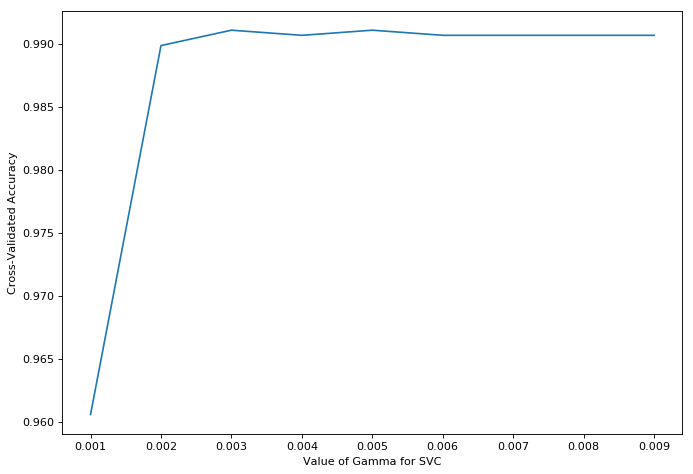

In [108]:
# lets dig a little deeper
accu_list = list()
for c in np.arange(0.001,0.01,0.001):
    result = funct_tune_svm('rbf',c,X3,y,5,'accuracy')
    accu_list.append(result)
    
C_values=list(np.arange(0.001,0.01,0.001))
# value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(C_values,accu_list)
plt.xticks(np.arange(0.001,0.01,0.001))
plt.xlabel('Value of Gamma for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [109]:
tuning_rbf_svm = pd.DataFrame(columns=['Parameter Gamma', 'Accuracy'])
tuning_rbf_svm['Parameter Gamma'] = np.arange(0.001,0.01,0.001)
tuning_rbf_svm['Accuracy'] = accu_list
tuning_rbf_svm

,Parameter Gamma,Accuracy
0,0.001,0.960562
1,0.002,0.989837
2,0.003,0.991057
3,0.004,0.990650
4,0.005,0.991057
5,0.006,0.990650
6,0.007,0.990650
7,0.008,0.990650
8,0.009,0.990650


**Tuning polynomial kernel**

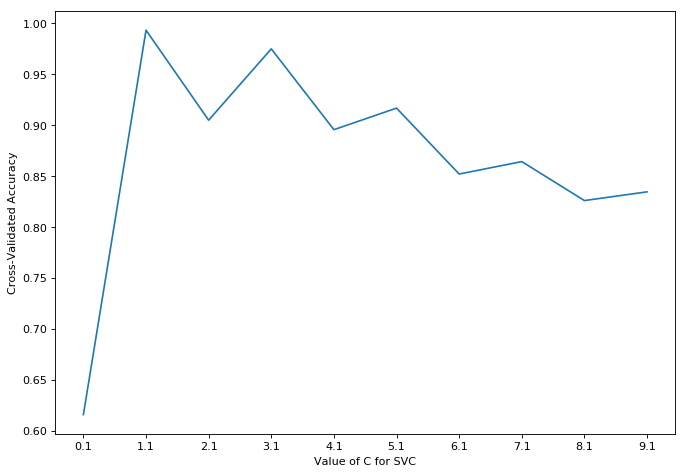

In [113]:
accu_list = list()
for c in np.arange(0.1,10,1):
    result = funct_tune_svm('poly',c,X3,y,5,'accuracy')
    accu_list.append(result)
    
C_values=list(np.arange(0.1,10,1))
# value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(C_values,accu_list)
plt.xticks(np.arange(0.1,10,1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [114]:
tuning_poly_svm = pd.DataFrame(columns=['Parameter Degree', 'Accuracy'])
tuning_poly_svm['Parameter Degree'] = np.arange(0.1,10,1)
tuning_poly_svm['Accuracy'] = accu_list
tuning_poly_svm

,Parameter Degree,Accuracy
0,0.1,0.615948
1,1.1,0.993089
2,2.1,0.904793
3,3.1,0.974783
4,4.1,0.895480
5,5.1,0.916632
6,6.1,0.851958
7,7.1,0.864161
8,8.1,0.825925
9,9.1,0.834472


**Let's do some grid search to find best parameters**

In [115]:
# SVM by taking hyperparameter C=0.6 and kernel as linear
svc=SVC(kernel='linear',C=0.6)
scores = cross_val_score(svc, X3, y, cv=10, scoring='accuracy')
print(scores.mean())

0.993927125506


In [116]:
# With rbf gamma value = 0.01
svc= SVC(kernel='rbf',gamma=0.005)
svc.fit(X3_train,y3_train)
y_predict=svc.predict(X3_test)
metrics.accuracy_score(y3_test,y_predict)

0.99390243902439024

In [117]:
#grid search with different tuning parameters
svm_obj= SVC()
grid_parameters = {
 'C': [0.1,0.6,1.1,1.6] , 'kernel': ['linear'],
 'C': [0.1,0.6,1.1,1.6] , 'gamma': [0.002,0.003,0.004,0.005], 'kernel': ['rbf'],
 'degree': [1,2,3] ,'gamma':[0.002,0.003,0.004,0.005], 'C':[0.1,0.6,1.1,1.6] , 'kernel':['poly']
                   }
model_svm = GridSearchCV(svm_obj, grid_parameters,cv=10,scoring='accuracy')
model_svm.fit(X3_train, y3_train)
print(model_svm.best_score_)
print(model_svm.best_params_)
y_pred= model_svm.predict(X3_test)

0.992370295015
{'C': 1.6, 'degree': 1, 'gamma': 0.005, 'kernel': 'poly'}


In [119]:
svm_performance = metrics.accuracy_score(y_pred,y3_test)
svm_performance

0.99390243902439024

In [120]:
gridSearch_kernal_result = pd.DataFrame([{'kernel': 'poly', 'gamma': 0.005, 'degree': 1, 'C': 1.6}],columns=['kernel','C','gamma','degree'])
gridSearch_kernal_result

,kernel,C,gamma,degree
0,poly,1.6,0.005,1


**We can see that polynomial kernal with <br/>
penalty measure of C=1.6 and gamma = 0.005 and with degree=1 gives<br/>
highest accuracy of 0.9939 in classifying the target variable.**

**FINALLY !!!!<BR/>
LET'S VISUALIZE THE RESULTS**

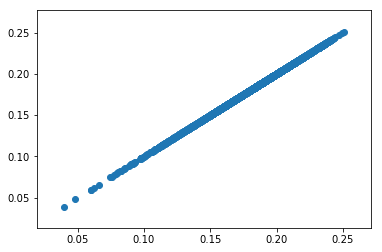

In [124]:
#Scatter plot with strong correlation
plt.scatter(df['meanfreq'],df['centroid'])

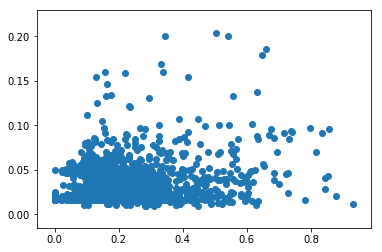

In [125]:
#Scatter plot with weak correlation 
plt.scatter(df['modindx'],df['minfun'])

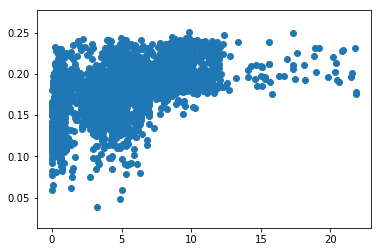

In [126]:
#Scatter plot with moderate correlation
plt.scatter(df['dfrange'],df['centroid'])

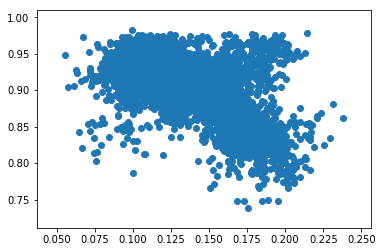

In [127]:
#Scatter plot with moderate negative correlation
plt.scatter(df['meanfun'],df['sp.ent'])

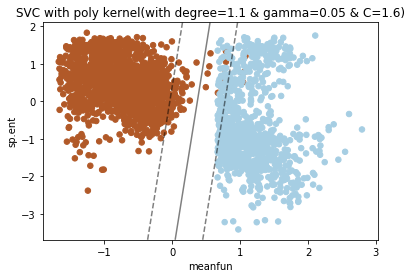

In [132]:
#lets import some data (**TRIVIAL**)
X11 = X3[['meanfun','sp.ent']].copy()
X11 = np.array(X11)
y = np.array(y)

# fit the model, no regularization for illustration purposes
clf = SVC(kernel='poly', degree=1.1, gamma = 0.05,C=1.6)
clf.fit(X11, y)

# title for the plots
title = ('SVC with poly kernel(with degree=1.1 & gamma=0.05 & C=1.6)')

plt.scatter(X11[:, 0], X11[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
ax.set_xlabel('meanfun')
ax.set_ylabel('sp.ent')
ax.set_title(title)
plt.show()

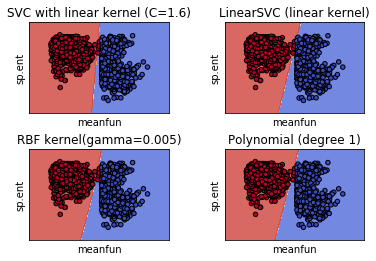

In [135]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
X11 = X3[['meanfun','sp.ent']].copy()
X11 = np.array(X11)
y = np.array(y)

C = 1.6  # SVM regularization parameter
models = (SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          SVC(kernel='rbf', gamma=0.005, C=C),
          SVC(kernel='poly', degree=1, gamma=0.005, C=C))
models = (clf.fit(X11, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel (C=1.6)',
          'LinearSVC (linear kernel)',
          'RBF kernel(gamma=0.005)',
          'Polynomial (degree 1)')

# Set-up 2x2 grid for plotting.
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X12 = X11[:, 0], X11[:, 1]
xx, yy = make_meshgrid(X0, X12)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X12, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('meanfun')
    ax.set_ylabel('sp.ent')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()